In [25]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [37]:
#population of Liberia, 2014 = 4,294,000
I = 846
R = 735
S = 4292419
#mortality rate is 0.7^15 
#beta = mortality/population susceptible
β = 1.63*(10^-7)
#duration of disease ranges from 2 to 18 days so midpoint of 10 days
γ = 0.1

dS_dt = - β*I*S
dI_dt =   β*I*S - γ*I
dR_dt =   γ*I

None

In [39]:
def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=4292419, I=846, R=735)

    t0 = 0
    t_end = 60

    return System(init=init, t0=t0, t_end=t_end,
                  β=β, γ=γ)

In [40]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    t: time
    system: System object
    
    returns: State (sir)
    """
    S, I, R = state

    dS_dt = - β*I*S
    dI_dt =   β*I*S - γ*I
    dR_dt =   γ*I
    
    S += dS_dt
    I += dI_dt
    R += dR_dt
    
    return State(S=S, I=I, R=R)

In [41]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [42]:
system = make_system(β, γ)

results = run_simulation(system, update_func)

,S,I,R
0,4292419,846,735
1,7.69534e+10,-7.69491e+10,819.6
2,-1.25476e+23,1.25476e+23,-7.69491e+09
3,-3.33622e+47,3.33622e+47,1.25476e+22
4,-2.35853e+96,2.35853e+96,3.33622e+46
5,-1.17873e+194,1.17873e+194,2.35853e+95
6,-inf,inf,1.17873e+193
7,-inf,NaN,inf
8,NaN,NaN,NaN
9,NaN,NaN,NaN


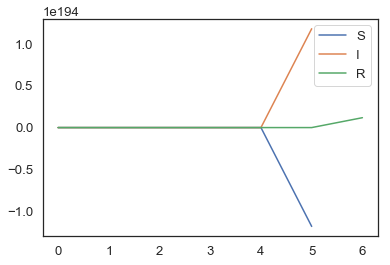

In [44]:
results.plot()